In [1]:
!pip3 install polyglot
!pip3 install pyicu
!pip3 install pycld2
!pip3 install morfessor
!polyglot download embeddings2.en
!polyglot download pos2.en
!polyglot download ner2.en
!polyglot download morph2.en
!polyglot download sentiment2.en
!polyglot download transliteration2.hi
!pip3 install wordninja
!pip3 install SpellChecker
!pip3 install indexer
!pip3 install defaultlist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 8.4 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52577 sha256=3b06e1232831a25e1e80b8c20ab649ee95b3efec5efaa16695550ca2434f6978
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
Successfully built polyglot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyicu: filename=PyICU-2.9-cp37-cp37m-linux_x86_64.whl size=1375549 sha256=4426e826a68cae869aed0efccd6bccbe0eb1530c63f81f451975c32bd7953bdc
  Stored in directory: /root/.cache/pip/wheels/28/88/93/6c1b06361e4cbd4e7f793fb456729f69798f9aa3fc2a791cd7
S

In [2]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
## for data
import pandas as pd
import numpy as np
import collections
import csv

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re

## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim
#multilingual text(NLP)processing toolkit
import polyglot
from polyglot.detect import Detector
# wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
#from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")
import datetime
from defaultlist import defaultlist

In [7]:
data = pd.read_csv("atweets_complete_labeled.csv")
data.shape #15073*36

(15073, 36)

# Choose Variables

In [8]:
data.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'is_misinfo'],
      dtype='object')

In [9]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(inplace=True)
missing_value_df

,index,column_name,percent_missing
0,coordinates,coordinates,99.787700
1,created_at,created_at,17.727062
2,hashtags,hashtags,77.164466
3,media,media,82.684270
4,urls,urls,79.705434
5,favorite_count,favorite_count,17.727062
6,id,id,0.000000
7,in_reply_to_screen_name,in_reply_to_screen_name,100.000000
8,in_reply_to_status_id,in_reply_to_status_id,100.000000
9,in_reply_to_user_id,in_reply_to_user_id,100.000000


In [10]:
# exlude the columns have more than 60% missing rate
# reason: 1) meaningless 2)hard to impute, but keep the hashtags variable
include = missing_value_df.query('percent_missing < 60')
include['column_name']

1                     created_at
5                 favorite_count
6                             id
10                          lang
14                 retweet_count
17                        source
18                          text
19                     tweet_url
20               user_created_at
21                       user_id
22    user_default_profile_image
23              user_description
24         user_favourites_count
25          user_followers_count
26            user_friends_count
27             user_listed_count
28                 user_location
29                     user_name
30              user_screen_name
31           user_statuses_count
34                 user_verified
35                    is_misinfo
Name: column_name, dtype: object

In [11]:
# keep cleaning some meaningless variables
df= data[include['column_name']]
df = pd.concat([df, data['hashtags']], axis=1)
df = df.drop(['tweet_url','user_default_profile_image','user_name','user_screen_name'], axis=1) #30146*19 

In [12]:
# clean by row
df.dropna(subset=['text'],inplace=True) 
df #12401*19

,created_at,favorite_count,id,lang,retweet_count,source,text,user_created_at,user_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_statuses_count,user_verified,is_misinfo,hashtags
0,Thu Dec 31 21:51:12 +0000 2020,4.0,1344763058888048643,en,0.0,"<a href=""http://twitter.com/download/iphone"" r...",My 87 year old grandmother has been quarantini...,Mon Aug 17 03:29:13 +0000 2009,6.626552e+07,"Just a girl, sitting in front of Twitter, aski...",7598.0,1134.0,784.0,41.0,"Washington, DC",14439.0,False,0,NaN
1,Thu Dec 31 21:25:47 +0000 2020,2.0,1344756661567823872,en,0.0,"<a href=""http://twitter.com/download/iphone"" r...",I’m so excited that with this vaccine I can se...,Tue May 05 18:48:17 +0000 2009,3.798917e+07,Event Coordinator. Employee Appreciation/Engag...,2346.0,292.0,241.0,5.0,"Springfield, Mo",7598.0,False,0,417fightscovid
2,Thu Dec 31 19:52:12 +0000 2020,3.0,1344733112454942721,en,0.0,"<a href=""http://instagram.com"" rel=""nofollow"">...",So excited that I was able to close out 2020 o...,Thu Mar 05 21:34:58 +0000 2009,2.298298e+07,29. Ravenclaw. She/Her. Bi. Actress. Cosplayer...,20634.0,577.0,799.0,33.0,"Maryland, USA",11948.0,False,0,NaN
3,Thu Dec 31 22:20:47 +0000 2020,1.0,1344770503014297602,en,0.0,"<a href=""http://twitter.com/download/android"" ...","Well, it happened. My daughter used my grandch...",Tue Dec 17 03:28:14 +0000 2019,1.206778e+18,Christian 🙌🏾📖🛡🙏🏾❤\n ...,50075.0,380.0,1155.0,0.0,NaN,31186.0,False,1,StandStrong
4,Thu Dec 31 18:56:24 +0000 2020,1.0,1344719068520095744,en,0.0,"<a href=""http://twitter.com/download/iphone"" r...","I’m getting my COVID-19 vaccine, baby! I’m so ...",Fri Oct 23 23:34:15 +0000 2020,1.319784e+18,I’m Beau! They/they + he/him | 28 | Transmasc ...,30962.0,2513.0,377.0,2.0,Your mom's bedroom,3282.0,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,Thu Jul 08 12:50:32 +0000 2021,2.0,1413118303283810311,en,0.0,"<a href=""http://twitter.com/download/android"" ...",Ooh! Potential #CoronaVac by @Sinovac side-eff...,Fri May 02 08:51:46 +0000 2008,1.462372e+07,"One part carbon allotrope,uber-shikse-non-grat...",15087.0,81.0,438.0,1.0,NaN,8403.0,False,0,CoronaVac
12397,Thu Jul 08 14:27:54 +0000 2021,0.0,1413142807024336909,en,0.0,"<a href=""http://triumphofdeath.bigcartel.com/""...","This rocks, very excited to get the vaccine as...",Tue Aug 22 23:14:04 +0000 2017,9.001340e+17,RT = Best burger I've had in awhile,0.0,51.0,2.0,0.0,Brushing my teeth in the hall,19201.0,False,0,NaN
12398,Thu Jul 08 14:30:36 +0000 2021,0.0,1413143486568681478,en,0.0,"<a href=""https://www.hootsuite.com"" rel=""nofol...",We're excited to announce a COVID-19 vaccinati...,Fri Aug 20 21:01:38 +0000 2010,1.809212e+08,A 501c3 agency promoting the image of #family ...,1132.0,6397.0,1783.0,111.0,"Atlanta, GA",23751.0,False,0,NaN
12399,Thu Jul 08 13:35:18 +0000 2021,111.0,1413129569662554117,en,13.0,"<a href=""http://twitter.com/download/android"" ...",Dec 2020:\nMOH: Vaccines are here!\nFPs: Yay! ...,Sun Dec 20 13:42:15 +0000 2015,4.612856e+09,rural family doc | writer | @QueensU family me...,23062.0,13331.0,1587.0,124.0,Huron-Wendat/Anishinabewaki,14715.0,True,0,NaN


# Explore by each variable

## General

data type

In [13]:
df.dtypes

created_at                object
favorite_count           float64
id                         int64
lang                      object
retweet_count            float64
source                    object
text                      object
user_created_at           object
user_id                  float64
user_description          object
user_favourites_count    float64
user_followers_count     float64
user_friends_count       float64
user_listed_count        float64
user_location             object
user_statuses_count      float64
user_verified             object
is_misinfo                 int64
hashtags                  object
dtype: object

missing data

In [14]:
df.isnull().sum()

created_at                  0
favorite_count              0
id                          0
lang                        0
retweet_count               0
source                      0
text                        0
user_created_at             0
user_id                     0
user_description         1119
user_favourites_count       0
user_followers_count        0
user_friends_count          0
user_listed_count           0
user_location            3250
user_statuses_count         0
user_verified               0
is_misinfo                  0
hashtags                 8959
dtype: int64

label

In [15]:
sum(df['is_misinfo'] == 1.0) / df.shape[0] 
# 34.08 % of data is misleading info
# since no missing data in label, the rest of 66% of data is true claim

0.34085960809612126

clean text

In [16]:
####
# text variable
# clean text

# clean emoji, punctuation (but keep & since J&J is frequently use and helpful but remove '&amp', keep @xxx phrase and add to additional column)
# lower case
# remove web addressess but add to additional column
# remve nostandard, special characters. 
# remove stop words except the personal pronouns
# stem words 
# I will stem
# remove table or other, keep space only in one text

def pre_process(data, flg_stemm = False):
  # @input: pandas series 
  # @output: clean pandas series
  result = []
  refer = defaultlist(defaultlist())
  for line in data:
    # clean (convert to lowercase, remove punctuations and numbers and then strip)
    line = re.sub(r'[^\w\s]', '', str(line).lower().strip())
    clean_tokens = line.split()
    #tokens = line.lower().strip().split()
    #clean_tokens = [t for t in tokens if re.match(r'[^\W\s]*$', t)] # this will remove emoji and website but i don't want to remove the word'Pfizer!' or 'pfizer. need to improve that' ( it works)
    # remove stop words (how can I remove part of stop words but keep the Personal Pronoun)
    stopwords = nltk.corpus.stopwords.words("english")
    personal_pronoun = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves']
    stopwords_without_person = list(set(stopwords) - set(personal_pronoun))
    non_stop = [clean_non_stop for clean_non_stop in clean_tokens if clean_non_stop not in stopwords_without_person]
    # remove website link by remove any string begin with https
    prefix = 'https'
    non_stop_wo_website = [x for x in non_stop if not x.startswith(prefix)]
    
    # stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
      ps = nltk.stem.porter.PorterStemmer()
      non_stop_ps = [ps.stem(word) for word in non_stop_wo_website]
      # from list to string
      text = " ".join(non_stop_ps)
    else:
      text = " ".join(non_stop_wo_website)
    result.append(text)
  return result

In [17]:
df['clean text'] = pre_process(df['text'],flg_stemm=True)
df['clean text without stem'] = pre_process(df['text'])

In [18]:
df['clean text']

0        my 87 year old grandmoth quarantin her florida...
1        im excit vaccin i see day we get back work tha...
2        excit i abl close 2020 posit note get first do...
3        well it happen my daughter use my grandchildre...
4              im get my covid19 vaccin babi im fuck excit
                               ...                        
12396    ooh potenti coronavac sinovac sideeffect im si...
12397    rock excit get vaccin mani time they say pussi...
12398    excit announc covid19 vaccin drive partnership...
12399    dec 2020 moh vaccin fp yay readi moh di fp bed...
12400    fauci unvaccin american get polit statement am...
Name: clean text, Length: 12401, dtype: object

In [19]:
df['clean text without stem']

0        my 87 year old grandmother quarantining her fl...
1        im excited vaccine i see day we get back work ...
2        excited i able close 2020 positive note gettin...
3        well it happened my daughter used my grandchil...
4        im getting my covid19 vaccine baby im fucking ...
                               ...                        
12396    ooh potential coronavac sinovac sideeffect im ...
12397    rocks excited get vaccine many times they say ...
12398    excited announce covid19 vaccination drive par...
12399    dec 2020 moh vaccines fps yay ready moh dis fp...
12400    fauci unvaccinated americans get political sta...
Name: clean text without stem, Length: 12401, dtype: object

## Single: create_at

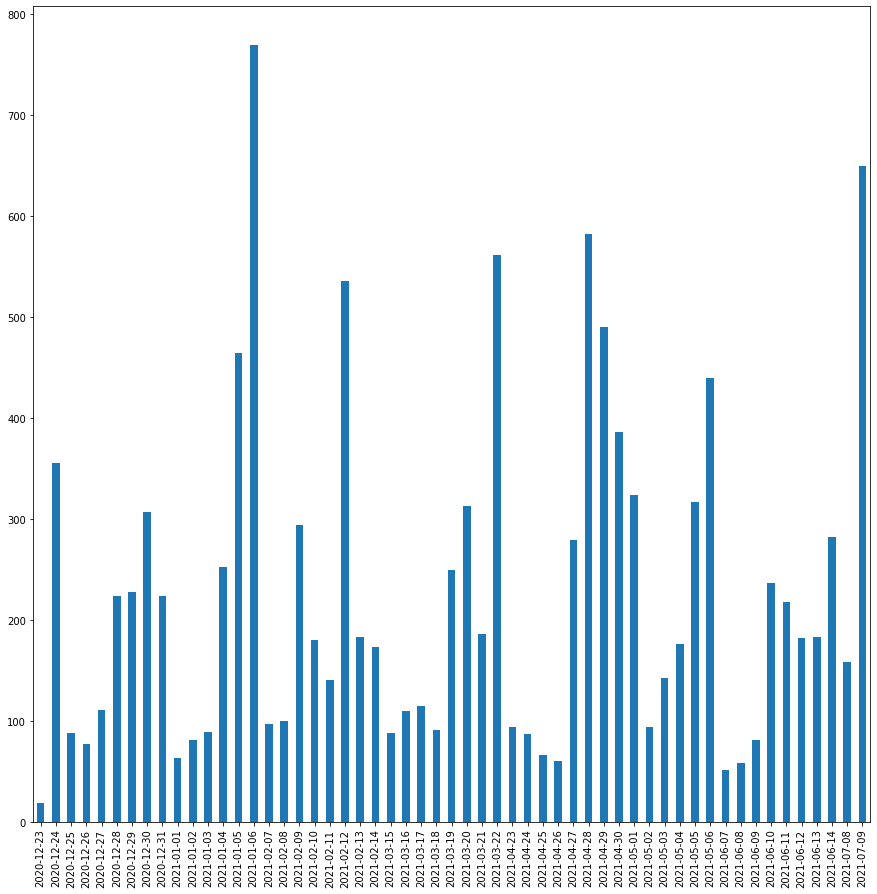

In [20]:
# convert object to correct type: datetime
df['created_at'] = df['created_at'].apply(lambda x: datetime.datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))
df['created_at'] = df['created_at'].dt.date
plt.figure(figsize=(15,15))
df['created_at'].value_counts().sort_index().plot.bar()
# what happened in these days: 2021-01-9: US capitol attack

## Single: favorite_count

In [21]:
# meaning under this variable: number of time being liked
df['favorite_count'].describe() 
# TO-DO: look into detail with high like

count     12401.000000
mean         29.953230
std        1059.904087
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max      112043.000000
Name: favorite_count, dtype: float64

## Single: lang

In [22]:
# covert lang into correct dtype
df['lang'].unique()

array(['en', 'nl', 'da', 'fr', 'de', 'es', 'tl', 'in'], dtype=object)

In [23]:
df_en = df[df['lang'] == 'en'] #12393 * 25

In [24]:
# even they filtered with english language only, i want to double check
index = -1
for line in df['clean text without stem']:
  index = index + 1
  if (Detector(line, quiet=True).language.confidence < 95.0) or (Detector(line, quiet=True).language.name != 'English') :
    print(index, "   ", line)
  #print(Detector(line, quiet=True).language)

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

175     dose 1 vaccine
256     excited 221 credits nbcsnl theslystallone chriskattan willferrell ambersings gypotech gypotech webuildbrandsgypo 2021yearofsmiles 2021goals 2021จะมเธอปะ 2021wishes 2020wrapped smes 100daysofcode entrepreneurs vaccine
486     humbly grateful covid vaccine hopeful awe nurses pharmacists give thousands doses protect many they praying its widely available soon 1of2vics jamesrachal3 thisisourshot notthrowingawaymyshot fauciouchie atriumhealthproud
627     i thing grateful hopeful lets hope we quickly get capacity deliver vaccine widely especially our essential workers fauciouchie notthrowingawaymyshot thisisourshot covidvaccine
774     virus vaccine covid19 vaccine flushot elderabuse depopulation governmentcorruption medicalmurder bigpharma thesepeoplearesick thesepeopleareevil saveourelderly thegreatawakening wwg1wga
992     hello vaccine day
1050     me vaccine hits
1090     nurse tiffany dover still missing taking new experimental vaccine live tv falling gr

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

1229     your eyes ever came across hello уоu wаnna fuсk go tо gayfun org you dont need worry whats vaccine
1267     als je een hond je mond laat likken mf dont worry whats vaccine lmaoo
1660     yall go get vaccine
1669     got shot 1 vaccine
1672     2021 hold my vaccine
1674     line my vaccine
1693     its vaccine time
1802     got covid vaccine
1817     thanks pfizer
1821     pfizer moderna
1826     vaccine me please
1831     getting vaccine
1838     i got vaccine
1845     vaccine 1 2 today
1853     rollout strategy pfizerbiontech covid19 vaccine ontario covidvaccine coronavirus covid19
1863     1st step vaccine
1864     want vaccine bad
1868     got vaccine
1869     capitol police gotten vaccine
1880     yall feel vaccine
1915     i get vaccine
1916     vaccine stupid
1935     vaccine booked


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

2000     ahhh i get get vaccine
2060     mum vaccine phew
2148     se já usaste dupla casa de banho lk dont worry whats vaccine
2157     rushed vaccine
2206     dangerous vaccine_conspiracy explained maulvi ji government must explain it samrasta20 prachyam7 goldenthrust aklavya ankur2812 anopenletter001 arpispeaks isinghapurva gshobna epitomeindia pahadanladki
2658     vaccine inshallah
2812     got my vaccine
2829     got vaccine
2837     got covid vaccine
2866     got covid vaccine
2924     got covid vaccine
2948     i got vaccine


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

2965     got vaccine
2996     got my vaccine
3037     got vaccine
3319     vaccine 2 done
3330     vaccine debate
3492     its gene therapy vaccine dr david martin bitchuteから
3562     rushed vaccine
3607     vaccine way
3810     i take vaccine


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

3818     get vaccine
3862     got covid vaccine
3928     got vaccine
4025     vaccine booked
4026     vaccine booked
4069     plan your vaccine
4070     vaccine day
4107     former pfizer vp need vaccines pandemic effectively over酒井憲 note
4164     vaccine booked
4446     vaccine dose 2 done
4514     get vaccine you
4523     q get covid vaccine
4671     got moderna part 2


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

4683     got vaccine
4693     got covid vaccine
4696     got vaccine today
5285     i vaccine
5323     2nd vaccine shot
5328     pfizer back sunroof jab diggin vaccine gangsta lean woo hoo oooo
5329     my moderna crew
5392     2nd vaccine done
5397     got dose 1 pfizer
5458     im pfizer zaddy
5572     round 1 pfizer done


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

5621     i got my vaccine
5627     dose 1 my vaccine
5659     got my vaccine
5824     got my vaccine
5877     2nd covid vaccine
5967     fast pfizer
5969     its vaccine day
5984     vaccine day
5993     1st moderna dose complete


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

6015     vaccine day
6085     vaccine 2 day
6086     happy vaccine day
6207     vaccine plan
6220     got my vaccine
6229     got vaccine
6241     i got moderna
6257     got my vaccine
6528     depopulation trudeau


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

6834     two shots moderna
6838     moderna gang life
6847     vaccine good luck
6855     canadian athletes vaccine access tokyo games
6884     got d8 pfizer
6923     booked my vaccine
6958     2nd vaccine
7154     human bioweapons astrazeneca
7457     covid19 madness continues vaccine manufacturers vaccinate blinded group making it impossible evaluate safety experimental covid19 gene therapy fhttpsarticlesmercolacomsitesarticlesarchive20210420coronavirusvaccinesafetystudiesaspx
7552     journalists vaccinated central govt lots them passed due corona virus their duty demands protection indeditorsguild shekhargupta prannoyroyndtv bdutt narendramodi amitshah drharshvardhan arvindkejriwal msisodia satyendarjain vaccine


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

7842     ready vaccinated first one 0405 closer freedom vaccinated getvaccinated vaccination coronavirusvaccine coronavirus κορωνοιος astrazeneca
8026     make schools colleges covid vaccine centres avoid crowd vaccination process coronavirusvaccine vaccination covid_19 vaccines vaccine vaccineswork pmmodi sonusood akshaykumar abhiandniyu narendramodi pmoindia timesofindia amitshah kanganatea
8106     health workers sri lanka given second jab astrazeneca covishield vaccine today කවෂලඩ එනනත දවන මතරව ලබදම ඇරඹ covid19sl covidvaccine vaccineswork vaccination vaccine vaccinated coronavirusupdates lka colombo
8217     book online call vaccination cal center 888 6635683 vaxsaveslives vaxprotects getvaccinated covidvacccine astrazeneca washhands maskup socialdistance wearmask sanitize sixfeetapart themohwgovjm mohnerha wrhagovjm srhajamaica
8331     got my vaccine


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

8771     my vaccine booked
8841     vaccine next week
8849     got my 2nd vaccine
8857     got dose 1 moderna
8858     got my 2nd moderna
8860     booked my vaccine
9184     pfizer coronavirus vaccine extraordinarily effective protecting severe disease caused two dangerous variants according two studies published wednesday சயத சககறம இநத கமபனகள ஃபசர மடரன வகசன இநதயவல வகக ஏறபட பணணஙக
9212     soooo grateful point tears receive my first shot astrazeneca covidvaccine today thank you uniofoxford rampd made happen terima kasih pemerintah indonesia amp bali untuk organisasi dan logistik yang luar biasa vaccinessavelives
9362     jab bioweapon
9488     beware financial fallout vaccine bioweapons death wave collapse tax revenues pensions real estate values dollar inevitable com20210504bewarethefinancialfalloutfromthevaccinebioweaponsdeathwave html
9516     中共病毒疫苗是生物武器 extermination machine unmasked vaccinated people making healthy people sick pfizer document admits vaccinated people shed infectio

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

9803     vaccine bioweapon
10057     i want my vaccine
10083     i go ahead get vaccine nah
10094     me vaccine
10118     title vaccine causes death becomes sensitive sentence ccp 来自 youtube
10126     vaccine armbands
10152     vaccine daaayyy
10209     got vaccine
10230     moderna inside me
10267     got vaccine lock
10336     vaccine day
10385     depopulation
10405     booked my vaccine
10468     yay vaccine thurs
10489     my vaccine
10521     vaccine daaay bukas yay


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

10538     im registered vaccine waiting list 基礎疾患 pre existing condition still havent heard anything somehow we heard it might start midjune radio silence
10598     vaccine bioweapon dr peter mccullough reiner fuelmich june 11 2021 via bitchute covid19australia coronavaccine covidvaccine craigkellymp annastaciamp skynewsaust paulinehansonoz ozraeliavi ivermectin pfizer astrazeneca
10605     ill getting my first jab hospital umum sarawak thursday alhamdulillah bc time booking astrazeneca buka dulu min tk smpt nak daftarkan myself smpt dftrkan my parents je
10616     syukur last minute dpt vaccine sama sekali my parents i much fear them i constantly praying their safety alhamdulilah my heart ease 2nd jab 12 weeks semoga sentiasa dlm perlindungan allah swt journeytoherdimmunity cucukmyaz
10650     vaccine bioweapon
10653     my parents pfizer il 25 lugliooooo per dio pfizer pfizervaccine
10700     yayyy my dad 58 my mom 52 already got their first dose alhamdulillah my mom today dia suka g

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

11490     alhamdulillah jumlah volunteers yang mahu dicapai untuk operasi ppv mines telah mencapai sasaran fulltime recruitment myvac closed thanks everyone support join myvac without care allowance priority get vaccine allah sayang
11543     virus one needs poison vaccine لا_للتطعيم_الاجباري26
11549     alhamdulillah my parents amp late grandfathers youngest brother foreigner got their 1st doses already my opah completed 2 doses 1st pic mom mitec sinovac 2nd pic dad pwtc az 3rd pic popole dewan alwy gombak pfizer 4th pic opah ppv kuala kangsar pfizer
11558     bro i get vaccine
11638     team astrazeneca
11649     8 luglio 2021 ayesha k faines 35 anni ayesha k faines 35yearold journalist grapevine show panelist dead 14 weeks experimental pfizer mrna shot nessunacorrelazione seguici su telegram
11656     moderna squared
11885     you get vaccine
11907     my first vaccine
11924     i got my first dose vaccine today woke sleep abt news it broke my heart ㅠㅠ i hope fastest recovery sanie


In [25]:
# delete those tweets with multi-langs
filter = [256, 1090, 2148, 2206, 4107, 7552, 7842, 8026, 8106, 8217, 9184, 9212, 9488, 9516, 10118, 10538, 10598, 10700, 10616, 10747, 10860, 11089, 11454, 11549, 11649, 12126, 12170, 12236]
df_en = df_en[~df_en.index.isin(filter)]
df_en.shape  # 12365 * 21

(12365, 21)

## Single: retweet_count

In [26]:
df_en['retweet_count'].describe() 
# TO-DO: look into detail with high like

count    12365.000000
mean         4.475859
std        104.018807
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7795.000000
Name: retweet_count, dtype: float64

## Single: source

In [27]:
pd.set_option('max_rows', 120)
df_en['source'] = df_en['source'].apply(lambda x: re.findall('\>(.*)\<', str(x)))
df_en['source'] = df_en['source'].apply(lambda x: tuple(x))
source_count = df_en['user_id'].groupby(df_en['source']).count().reset_index()
source_count.sort_values('user_id', ascending=False)
# might be can category them into 'twitter for iphone', 'twitter web app'. 'twitter for android', 'twitter for ipad', 'other third parties'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,source,user_id
103,"(Twitter for iPhone,)",5440
98,"(Twitter Web App,)",3155
100,"(Twitter for Android,)",2703
102,"(Twitter for iPad,)",264
34,"(Hootsuite Inc.,)",119
...,...,...
51,"(Mirage News Posts,)",1
49,"(Microsoft Azure Logic Apps,)",1
48,"(Miami on the Cheap,)",1
47,"(Meltwater Social,)",1


In [28]:
def condition(x):
  if x== 'Twitter for iPhone':
    return 'Twitter for iPhone'
  elif x== 'Twitter Web App':
    return 'Twitter Web App'
  elif x== 'Twitter for Android':
    return 'Twitter for Android'
  elif x== 'Twitter for iPad':
    return 'Twitter for iPad'
  else:
    return 'Other Third Parties' 

source_count['source'] = source_count['source'].apply(lambda x: x[0]) 
source_count['source_5'] = source_count['source'].apply(lambda x: condition(x))

In [29]:
# do the some process for original data
df_en['source'] = df_en['source'].apply(lambda x: x[0]) 
df_en['source_5'] = df_en['source'].apply(lambda x: condition(x))

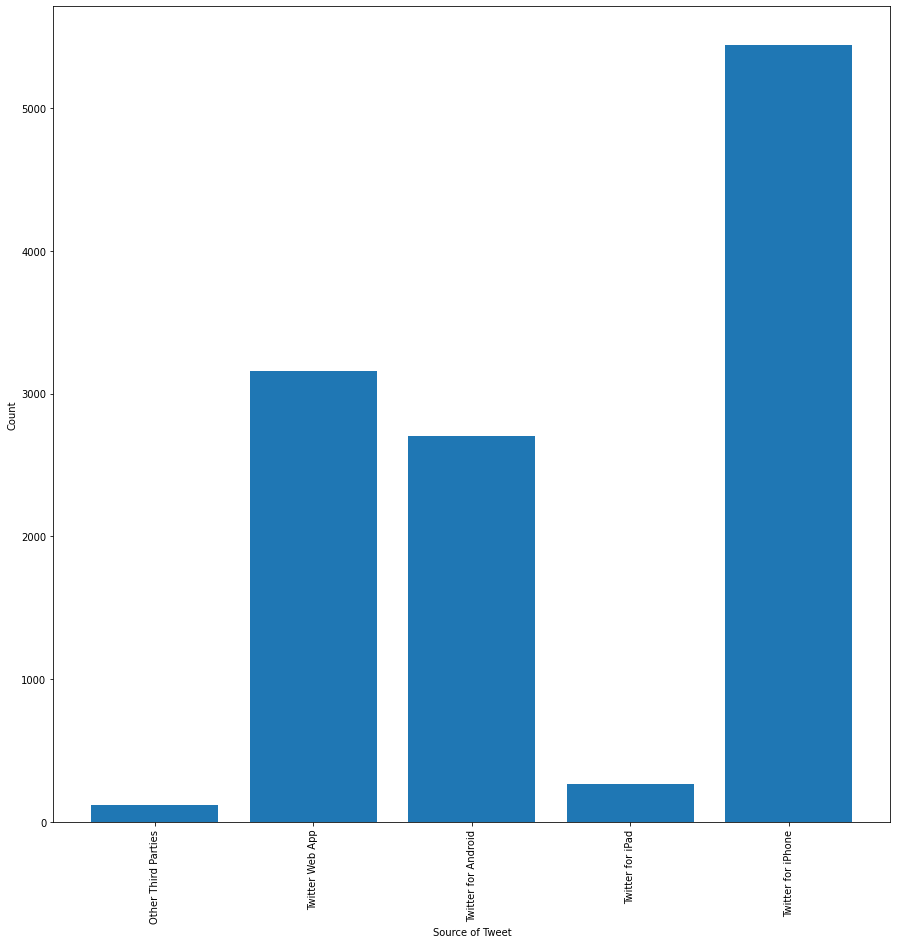

In [30]:
# show the frequency for source_5
plt.figure(figsize=(15,15))
plt.bar(source_count['source_5'],source_count['user_id'])
plt.xlabel('Source of Tweet', fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=10)
plt.show()

## Single: Text

In [31]:
# manually check some results from pre-processing of text part to ensure the functionality
# TO-DO: 
print(df_en['text'].iloc[0], "---->", df_en['clean text without stem'].iloc[0]) #add @back to let us know that they are referred to sombody (but don't put in the text section, add one more 'refer' column)
print(df_en['text'].iloc[100], "---->", df_en['clean text without stem'].iloc[100]) # add html back and store it in 'refer' section as well
print(df_en['text'].iloc[200], "---->", df_en['clean text without stem'].iloc[200]) # remove &amp as a whole phrase
print(df_en['text'].iloc[500], "---->", df_en['clean text without stem'].iloc[500]) 
print(df_en['text'].iloc[1000], "---->", df_en['clean text without stem'].iloc[1000]) 

My 87 year old grandmother has been quarantining in her Florida house for close to a year. She was so excited to go to @CityDaytona to get her COVID vaccine next week, only to find out @CountyOfVolusia only has 2000 doses spread out over 2 days. For a county of 500,000+. 1/3 ----> my 87 year old grandmother quarantining her florida house close year she excited go citydaytona get her covid vaccine next week find countyofvolusia 2000 doses spread 2 days county 500000 13
Understanding the dangers of mRNA vaccine. Experimental rewriting of human DNA unveiling the NWO antichrist agenda https://t.co/XdUqhUwcUj ----> understanding dangers mrna vaccine experimental rewriting human dna unveiling nwo antichrist agenda
The Govt and SAGE are working according to the script provided by Klaus Schwab of WEF which is to completely destroy the world economies so we have no money to live. Then they will offer a carrot &amp; stick - UBI if we take the poison vaccine that Bill Gates is pushing. It’s a cou

(-0.5, 999.5, 499.5, -0.5)

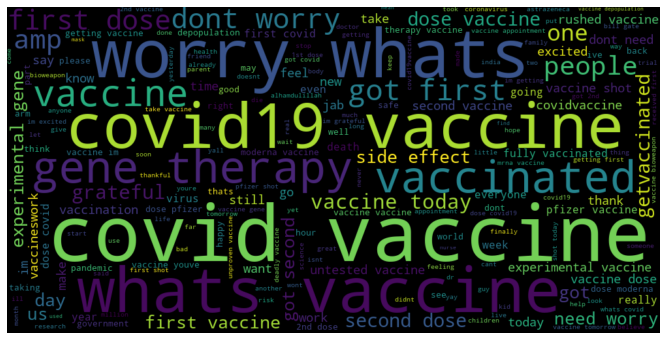

In [32]:
# word clouds for whole tweets
words = ' '.join([word for word in df_en['clean text without stem']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

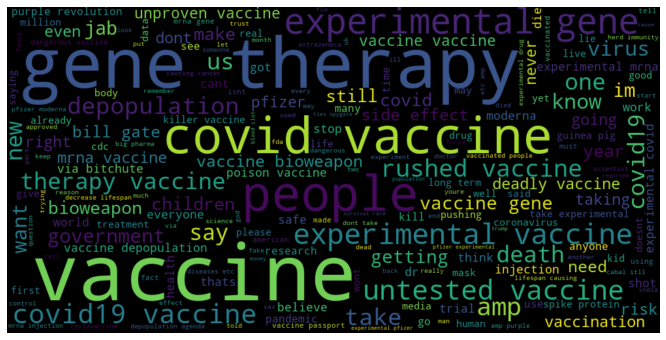

In [33]:
df_en_mis = df_en[df_en['is_misinfo'] == 1]
# word clouds for misleading tweets
words = ' '.join([word for word in df_en_mis['clean text without stem']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

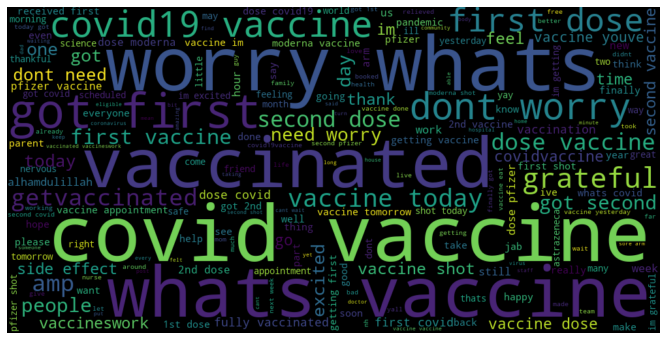

In [34]:
df_en_nonm = df_en[df_en['is_misinfo'] == 0]
# word clouds for non-misleading tweets
words = ' '.join([word for word in df_en_nonm['clean text without stem']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

## Single: user_created_at

In [35]:
# convert object to correct type: datetime
df_en['user_created_at'] = df_en['user_created_at'].apply(lambda x: datetime.datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))
df_en['user_created_at'] = df_en['user_created_at'].dt.date
df_en['user_created_at'].value_counts(ascending=False)
# nothing particular found on 2016-01-11
# 2020-05-31: George Floyd Protest & NASA-spaceX

2016-01-11    72
2020-05-31    21
2009-04-22    20
2009-03-31    17
2009-03-16    17
              ..
2017-05-22     1
2009-12-14     1
2018-10-04     1
2017-08-29     1
2010-06-26     1
Name: user_created_at, Length: 4286, dtype: int64

## Single: user_id

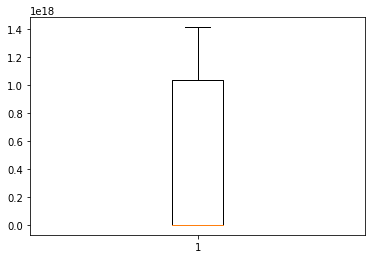

In [36]:
###
# user_id variable
# post per user
df_en['user_id'].value_counts(ascending=False).describe()
plt.boxplot(df_en['user_id'])
plt.show()

In [37]:
df_en['user_id'].value_counts(ascending=False).describe()


count    11440.000000
mean         1.080857
std          0.805621
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         71.000000
Name: user_id, dtype: float64

## Single: user_description 
To-DO: explore, and might use whether or not they have it in the model

## Single: user_favourites_count

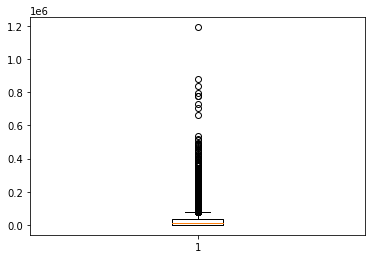

In [38]:
# TO-DO: meaning under this variable
plt.boxplot(df_en['user_favourites_count'])
plt.show()

In [39]:
df_en['user_favourites_count'].describe()

count    1.236500e+04
mean     2.989242e+04
std      5.518608e+04
min      0.000000e+00
25%      2.338000e+03
50%      1.055400e+04
75%      3.320300e+04
max      1.192100e+06
Name: user_favourites_count, dtype: float64

## Single: user_followers_count

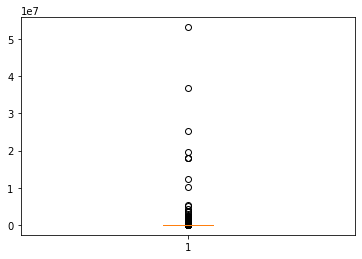

In [40]:
plt.boxplot(df_en['user_followers_count'])
plt.show()

## Single: user_friends_count

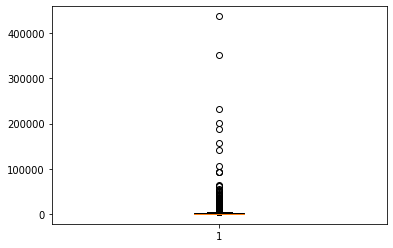

In [41]:
plt.boxplot(df_en['user_friends_count'])
plt.show()

In [42]:
df_en['user_friends_count'].describe()

count     12365.000000
mean       1572.706672
std        7115.436551
min           0.000000
25%         229.000000
50%         571.000000
75%        1402.000000
max      437449.000000
Name: user_friends_count, dtype: float64

## Single: user_listed_count  

count    12365.000000
mean         0.094469
std          0.234831
min         -1.000000
25%          0.000000
50%          0.012500
75%          0.243125
max          1.000000
Name: polarity, dtype: float64
count    12365.000000
mean         0.343107
std          0.278112
min          0.000000
25%          0.000000
50%          0.350000
75%          0.533333
max          1.000000
Name: subjectivity, dtype: float64


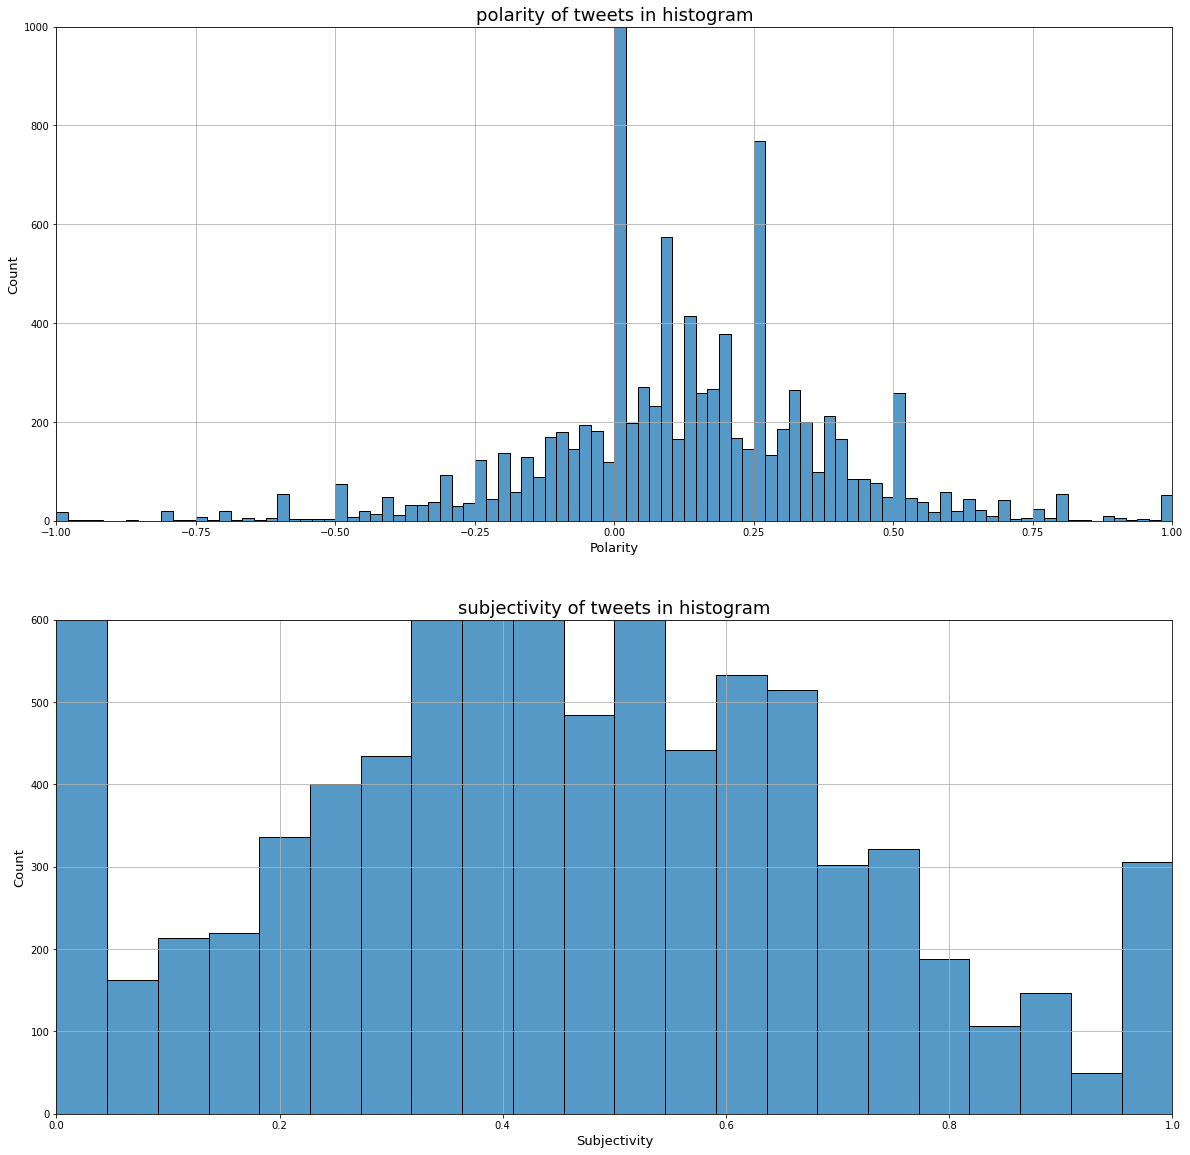

In [43]:
###
# text variable
# sentiment analysis
# pre-trained sentiment model, Textblob
# https://textblob.readthedocs.io/en/dev/
df_en['polarity'] = df_en['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_en['subjectivity'] = df_en['text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
print(df_en['polarity'].describe())
print(df_en['subjectivity'].describe())

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax2= fig.add_subplot(212)
g1= sns.histplot(df_en['polarity'],kde=False, ax=ax1)
g2= sns.histplot(df_en['subjectivity'],kde=False, ax=ax2)

ax1.set_title('polarity of tweets in histogram', fontsize = 18)
ax2.set_title('subjectivity of tweets in histogram', fontsize = 18)
ax1.grid(True)
ax2.grid(True)
ax1.set_xlabel("Polarity", fontsize = 13 )
ax1.set_ylabel("Count", fontsize = 13 )
#ax1.set(xlabel="Polarity",ylabel="Count")
#ax2.set(xlabel="Subjectivity",ylabel="Count")
ax2.set_xlabel("Subjectivity", fontsize = 13 )
ax2.set_ylabel("Count", fontsize = 13 )
#g1.xticks(fontsize=14)
#g2.yticks(fontsize=14)

g1.set(xlim=(-1,1),ylim=(0,1000))
g2.set(xlim=(0,1),ylim=(0,600))

plt.show()

fig.savefig("polarity_subjectivity", bbox_inches='tight')

## Single: user_location

In [44]:
print(df_en['user_location'].nunique()) #4983
df_en['user_location'].value_counts(ascending=False) 
# To-DO: any value for this infor?

4983


United States                    151
Los Angeles, CA                   95
Alexandria, VA                    73
USA                               73
London, England                   72
                                ... 
In a plane.                        1
Peaceful hills, Upper East TN      1
Rothbardia                         1
Wilderness of North America        1
Huron-Wendat/Anishinabewaki        1
Name: user_location, Length: 4983, dtype: int64

## Single: user_statuses_count

In [45]:
# TO-DO: find meaning under this variable
df_en['user_statuses_count']

0        14439.0
1         7598.0
2        11948.0
3        31186.0
4         3282.0
          ...   
12396     8403.0
12397    19201.0
12398    23751.0
12399    14715.0
12400    54316.0
Name: user_statuses_count, Length: 12365, dtype: float64

## Single: user_verified

In [46]:
type(df_en['user_verified'][0])

bool

## Single: hashtags

(-0.5, 999.5, 499.5, -0.5)

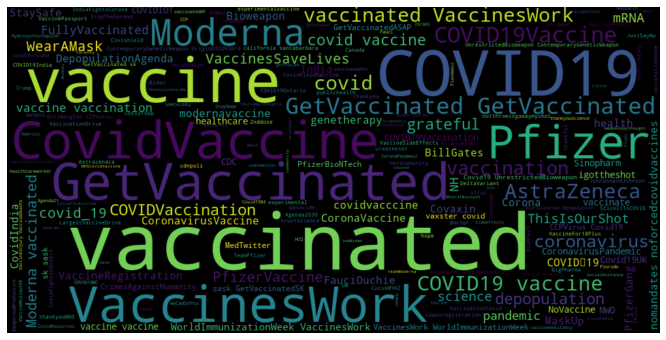

In [47]:
# word clouds for whole tweets
#df_en_mis = df_en[df_en['is_misinfo'] == 1]
df_en_hash_full = df_en.dropna(subset=['hashtags'],inplace=False) 

words = ' '.join([word for word in df_en_hash_full['hashtags']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

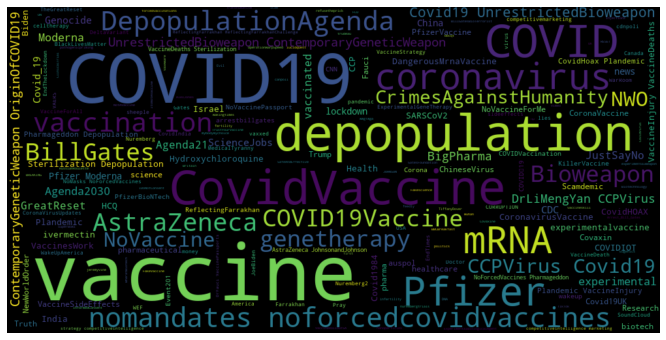

In [48]:
# word clouds for misleading tweets
df_en_hash_full_mis = df_en_hash_full[df_en_hash_full['is_misinfo'] == 1]

words = ' '.join([word for word in df_en_hash_full_mis['hashtags']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

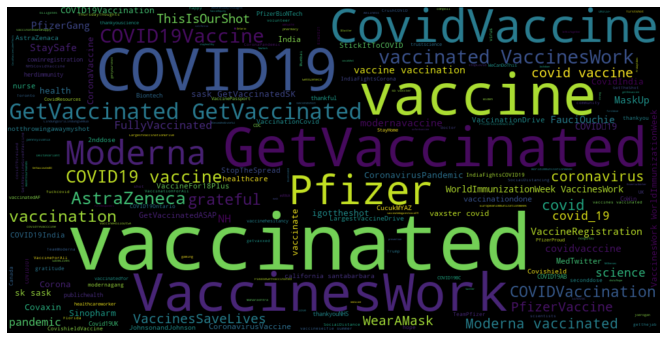

In [49]:
# word clouds for non-misleading tweets
df_en_hash_full_mis_non = df_en_hash_full[df_en_hash_full['is_misinfo'] == 0]

words = ' '.join([word for word in df_en_hash_full_mis_non['hashtags']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

# Clean Again before Modeling

In [50]:
# TO-DO: 
# 1. how to deal with time-series data before they feed into model
# 2. how to use 'user_description and user_location' before feeding into model
# 3. ways of transform text data
df_en.dtypes

created_at                  object
favorite_count             float64
id                           int64
lang                        object
retweet_count              float64
source                      object
text                        object
user_created_at             object
user_id                    float64
user_description            object
user_favourites_count      float64
user_followers_count       float64
user_friends_count         float64
user_listed_count          float64
user_location               object
user_statuses_count        float64
user_verified               object
is_misinfo                   int64
hashtags                    object
clean text                  object
clean text without stem     object
source_5                    object
polarity                   float64
subjectivity               float64
dtype: object

In [51]:
# To-DO: how to deal with the rest of missing data
df_en.isnull().sum() / df_en.shape[0]

created_at                 0.000000
favorite_count             0.000000
id                         0.000000
lang                       0.000000
retweet_count              0.000000
source                     0.000000
text                       0.000000
user_created_at            0.000000
user_id                    0.000000
user_description           0.090416
user_favourites_count      0.000000
user_followers_count       0.000000
user_friends_count         0.000000
user_listed_count          0.000000
user_location              0.262030
user_statuses_count        0.000000
user_verified              0.000000
is_misinfo                 0.000000
hashtags                   0.723332
clean text                 0.000000
clean text without stem    0.000000
source_5                   0.000000
polarity                   0.000000
subjectivity               0.000000
dtype: float64

In [52]:
# except text, date infor, id, enforce them into numeric
df_en_non_text = df_en.drop(['id','created_at','user_created_at','lang','source','text','user_description', 'user_location', 'hashtags', 'clean text', 'clean text without stem','source_5'], axis=1)
df_en_non_text = df_en_non_text.apply(pd.to_numeric, errors='coerce')

In [53]:
df_en_non_text.isnull().sum() / df_en_non_text.shape[0]

favorite_count           0.0
retweet_count            0.0
user_id                  0.0
user_favourites_count    0.0
user_followers_count     0.0
user_friends_count       0.0
user_listed_count        0.0
user_statuses_count      0.0
user_verified            0.0
is_misinfo               0.0
polarity                 0.0
subjectivity             0.0
dtype: float64

In [54]:
df_en_non_text.describe()

,favorite_count,retweet_count,user_id,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,is_misinfo,polarity,subjectivity
count,12365.000000,12365.000000,1.236500e+04,1.236500e+04,1.236500e+04,12365.000000,12365.000000,1.236500e+04,12365.000000,12365.000000,12365.000000
mean,30.025233,4.475859,4.356245e+17,2.989242e+04,2.593359e+04,1572.706672,125.391832,3.289275e+04,0.340962,0.094469,0.343107
std,1061.445022,104.018807,5.571431e+17,5.518608e+04,7.310492e+05,7115.436551,2840.167771,8.778189e+04,0.474052,0.234831,0.278112
min,0.000000,0.000000,2.360000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,2.372551e+08,2.338000e+03,1.570000e+02,229.000000,1.000000,3.059000e+03,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.425720e+09,1.055400e+04,5.330000e+02,571.000000,4.000000,1.068200e+04,0.000000,0.012500,0.350000
75%,6.000000,0.000000,1.037616e+18,3.320300e+04,1.838000e+03,1402.000000,19.000000,3.091700e+04,1.000000,0.243125,0.533333
max,112043.000000,7795.000000,1.413504e+18,1.192100e+06,5.322062e+07,437449.000000,215823.000000,3.202222e+06,1.000000,1.000000,1.000000


In [70]:
df_en_non_text['user_verified'] = df_en_non_text['user_verified'].astype(int)

In [71]:
# normalize the data 
df_en_non_text_c = df_en_non_text.copy()
  
# apply normalization techniques
for column in (set(df_en_non_text_c.columns)-set(df_en_non_text_c.columns[-3])):
    column_mean = df_en_non_text_c[column].mean()
    column_std = df_en_non_text_c[column].std()
    column_min = min(df_en_non_text_c[column])
    column_max = max(df_en_non_text_c[column])
    df_en_non_text_c[column] = (df_en_non_text_c[column] - column_min) / (column_max - column_min)  
  
# view normalized data
print(df_en_non_text_c.describe())

       favorite_count  retweet_count       user_id  user_favourites_count  \
count    12365.000000   12365.000000  1.236500e+04           12365.000000   
mean         0.000268       0.000574  3.081876e-01               0.025075   
std          0.009474       0.013344  3.941574e-01               0.046293   
min          0.000000       0.000000  0.000000e+00               0.000000   
25%          0.000000       0.000000  1.678472e-10               0.001961   
50%          0.000009       0.000000  1.716102e-09               0.008853   
75%          0.000054       0.000000  7.340735e-01               0.027853   
max          1.000000       1.000000  1.000000e+00               1.000000   

       user_followers_count  user_friends_count  user_listed_count  \
count          12365.000000        12365.000000       12365.000000   
mean               0.000487            0.003595           0.000581   
std                0.013736            0.016266           0.013160   
min                0.00000

In [72]:
df_en_non_text_c

,favorite_count,retweet_count,user_id,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_verified,is_misinfo,polarity,subjectivity
0,0.000036,0.000000,4.687865e-11,0.006374,2.130753e-05,0.001792,0.000190,0.004509,0.0,0.0,0.547500,0.590000
1,0.000018,0.000000,2.687421e-11,0.001968,5.486595e-06,0.000551,0.000023,0.002372,0.0,0.0,0.662500,0.575000
2,0.000027,0.000000,1.625791e-11,0.017309,1.084166e-05,0.001826,0.000153,0.003731,0.0,0.0,0.676847,0.563447
3,0.000009,0.000000,8.537493e-01,0.042006,7.140090e-06,0.002640,0.000000,0.009739,0.0,1.0,0.750000,0.500000
4,0.000009,0.000000,9.336968e-01,0.025973,4.721854e-05,0.000862,0.000009,0.001025,0.0,0.0,0.734375,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
12396,0.000018,0.000000,1.034405e-11,0.012656,1.521966e-06,0.001001,0.000005,0.002624,0.0,0.0,0.610000,0.680000
12397,0.000000,0.000000,6.368104e-01,0.000000,9.582752e-07,0.000005,0.000000,0.005996,0.0,0.0,0.778125,0.737500
12398,0.000000,0.000000,1.279932e-10,0.000950,1.201978e-04,0.004076,0.000514,0.007417,0.0,0.0,0.734375,0.750000
12399,0.000991,0.001668,3.263418e-09,0.019346,2.504856e-04,0.003628,0.000575,0.004595,1.0,0.0,0.643750,0.625000


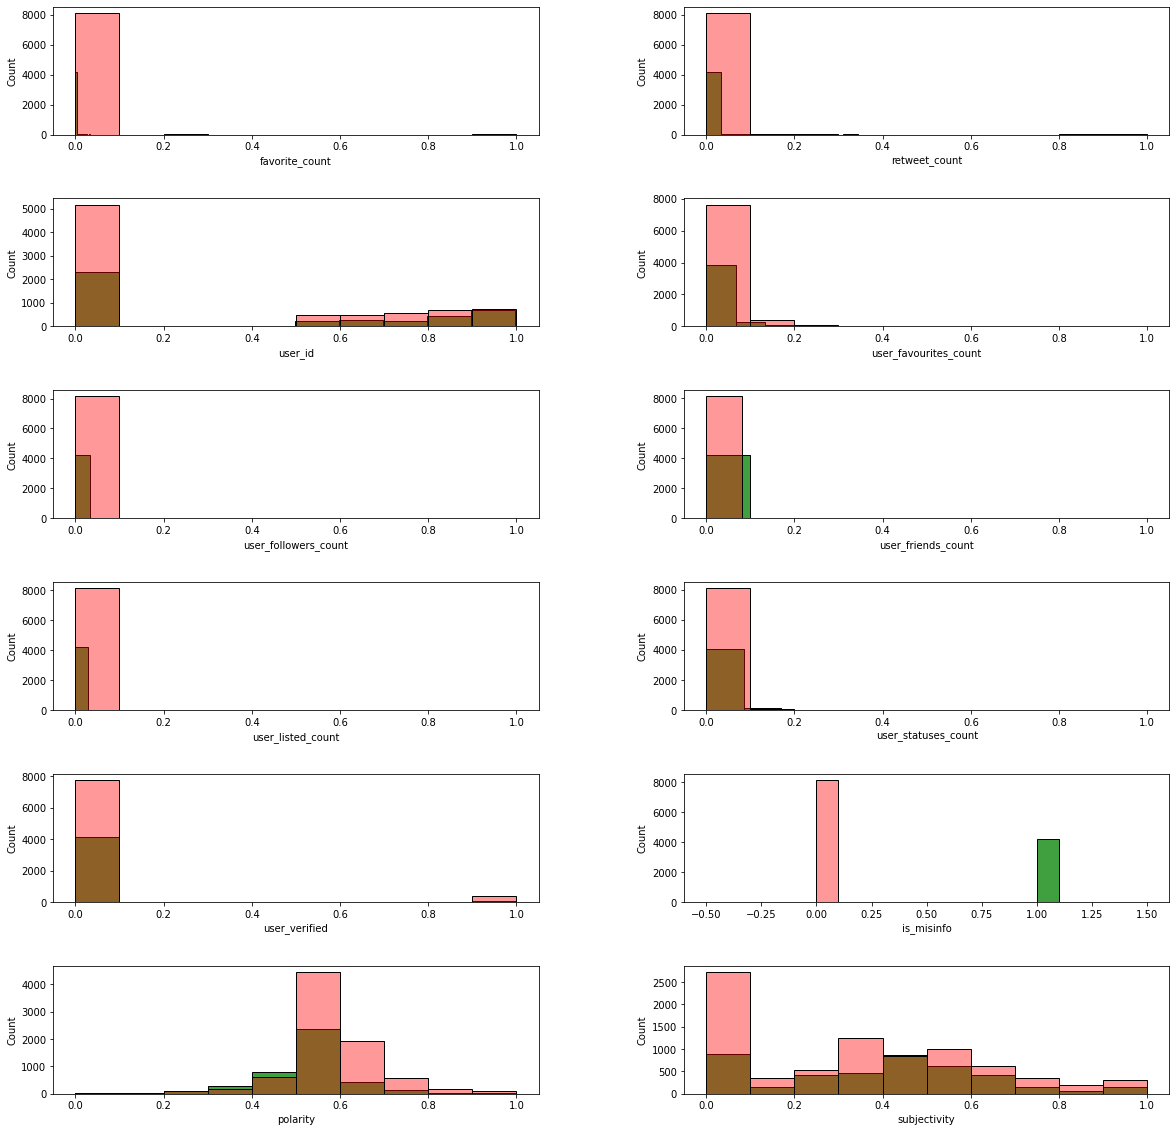

In [74]:
# plot each variables against label
input_columns = df_en_non_text_c.columns
num_columns = len(input_columns)
fig, axs = plt.subplots(6,2,figsize=(20,20))
fig.subplots_adjust(hspace=.5, wspace=.3)
axs = axs.ravel()
for ax_index, column in enumerate(input_columns):
  sns.histplot(data=df_en_non_text_c[df_en_non_text_c.is_misinfo==1], color='g', x=df_en_non_text_c[df_en_non_text_c.is_misinfo==1][column], bins=10, ax=axs[ax_index])
  sns.histplot(data=df_en_non_text_c[df_en_non_text_c.is_misinfo==0], color='r', x=df_en_non_text_c[df_en_non_text_c.is_misinfo==0][column], bins=10, ax=axs[ax_index],alpha=0.4)
  #sns.displot(df_en_non_text[df_en_non_text.is_misinfo==0][column], hist=True, kde=False, color='r', norm_hist=True, bins = 100, ax=axs[ax_index])


from the histplots, it seems non of these variables are very predictable(except the polarity might be a little bit), and needs more variable from free-text variables

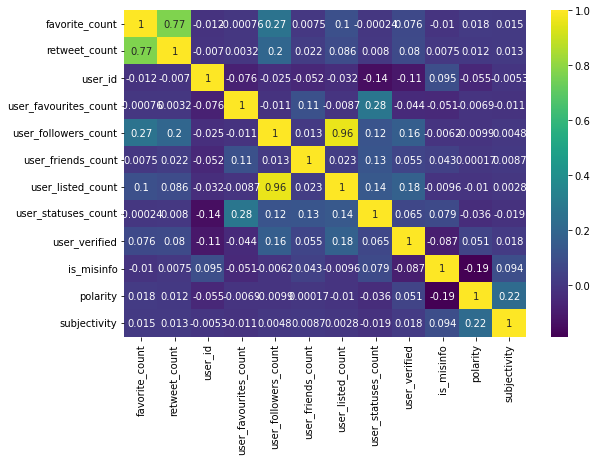

In [77]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_en_non_text_c.corr(), cmap='viridis',annot=True,ax=ax)

# Output

In [83]:
# df_en_non_text = df_en.drop(, axis=1)
df_en_non_text_c.to_csv('clean_data_without_some.csv', index=False)
df_final = pd.concat([df_en[['id','created_at','user_created_at','lang','source','text','user_description', 'user_location', 'hashtags', 'clean text', 'clean text without stem','source_5']],df_en_non_text_c], axis=1)
df_final.to_csv('clean_data.csv', index=False)